# Importing necessary libraries:

In [1]:
import numpy as np , pandas as pd
import matplotlib.pyplot as plt , seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset:

In [2]:
df=pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.size

11680

In [8]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## Data Cleaning :

In [9]:
#checking null values are there or not 
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# dropping unnecessary columns:

In [10]:
#after going through data dictionary instant is just an index column so we can drop it
df=df.drop(['instant'],axis=1)

In [11]:
#dteday is a date column and month , year are already given a seprate column
df=df.drop(['dteday'],axis=1)

In [12]:
#CNT is combination of casual and registered so we can drop both those columns:

In [13]:
df=df.drop(['casual'],axis=1)

In [14]:
df=df.drop(['registered'],axis=1)

In [15]:
#checking co-relation between variables
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


From above we can see that season, month and weekday are numerical but they should be in categorical data so we need to fix that 

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


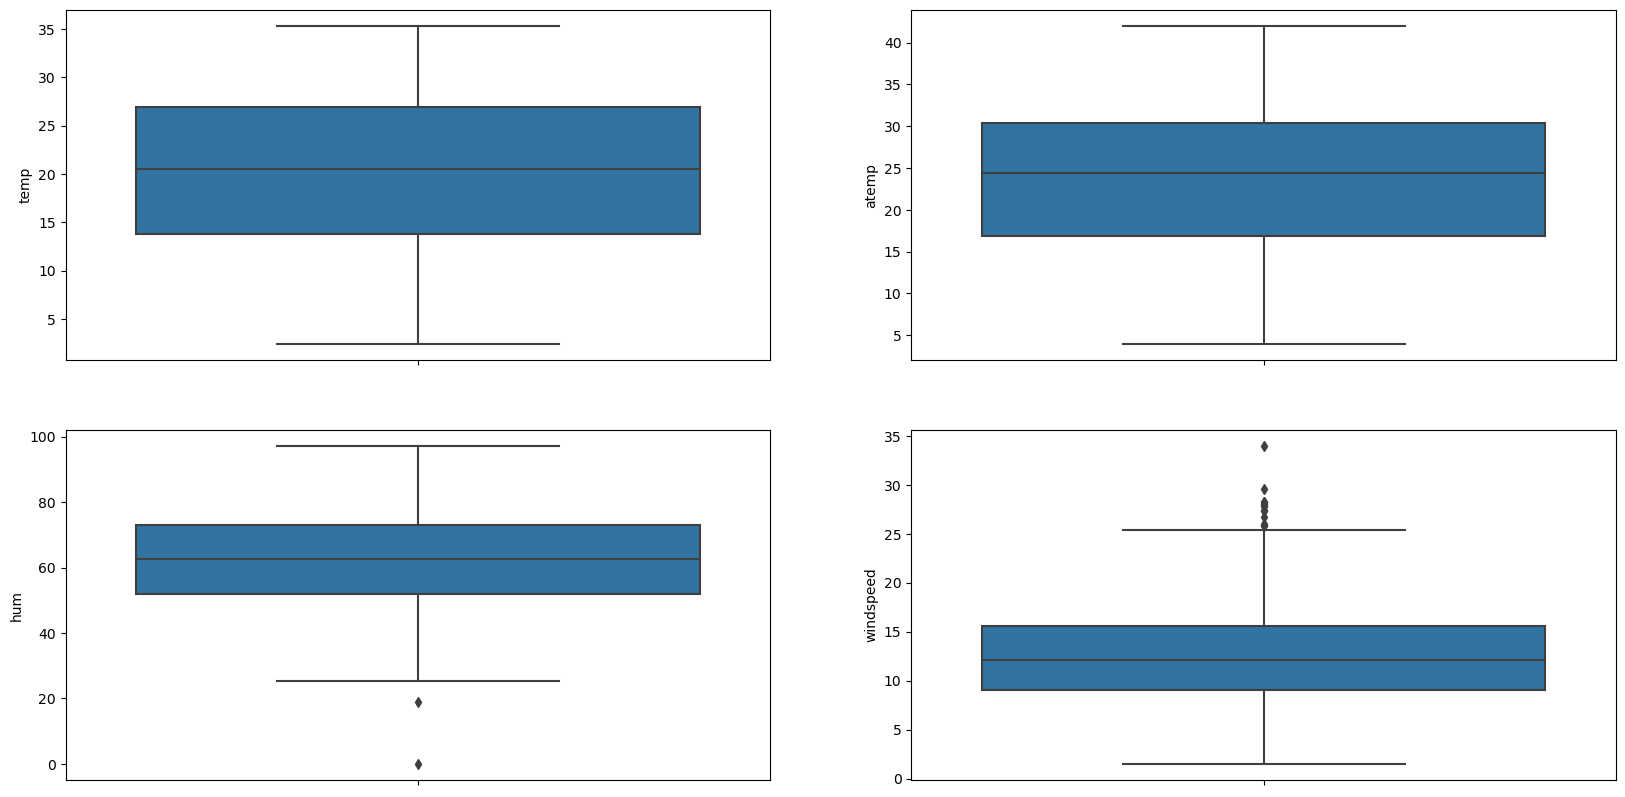

In [17]:
## Plotting boxplot of numerical columns:
num_cols=['temp','atemp','hum','windspeed']
plt.figure(figsize=[20,10])
i=1
for c in num_cols:
    plt.subplot(2,2,i)
    sns.boxplot(y=c,data=df)
    i=i+1

## EDA:

In [18]:
#converting some columns which should be in categorical but they are in numerical:
df.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
df.mnth.replace({1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',
                 8:'august',9:'september',10:'october',11:'november',12:'december'},inplace=True)
df.weekday.replace({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'},inplace=True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad'},inplace=True)

In [19]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,good,9.305237,11.46350,43.6957,12.522300,1600


## Plotting pairplots of Numerical columns:

<Figure size 2000x1500 with 0 Axes>

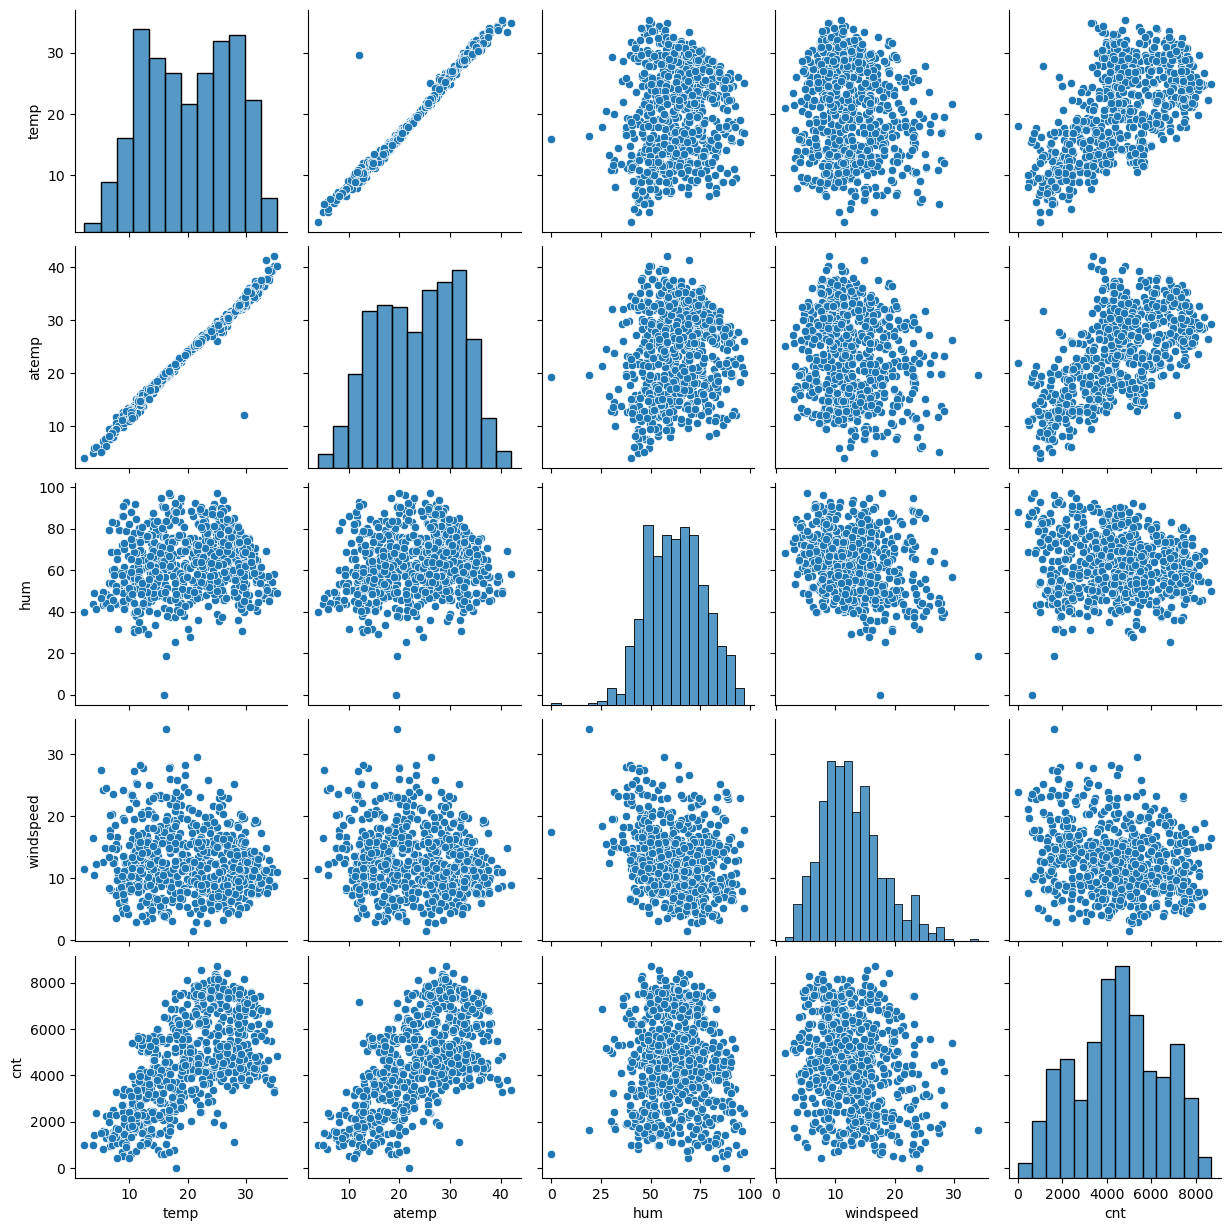

In [20]:
plt.figure(figsize=[20,15])
sns.pairplot(vars=['temp','atemp','hum','windspeed','cnt'],data=df)
plt.show()

From above plots we can see that there is a linear relationship between atemp and temp with target variable- cnt.

# Plotting boxplot for categorical columns:

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

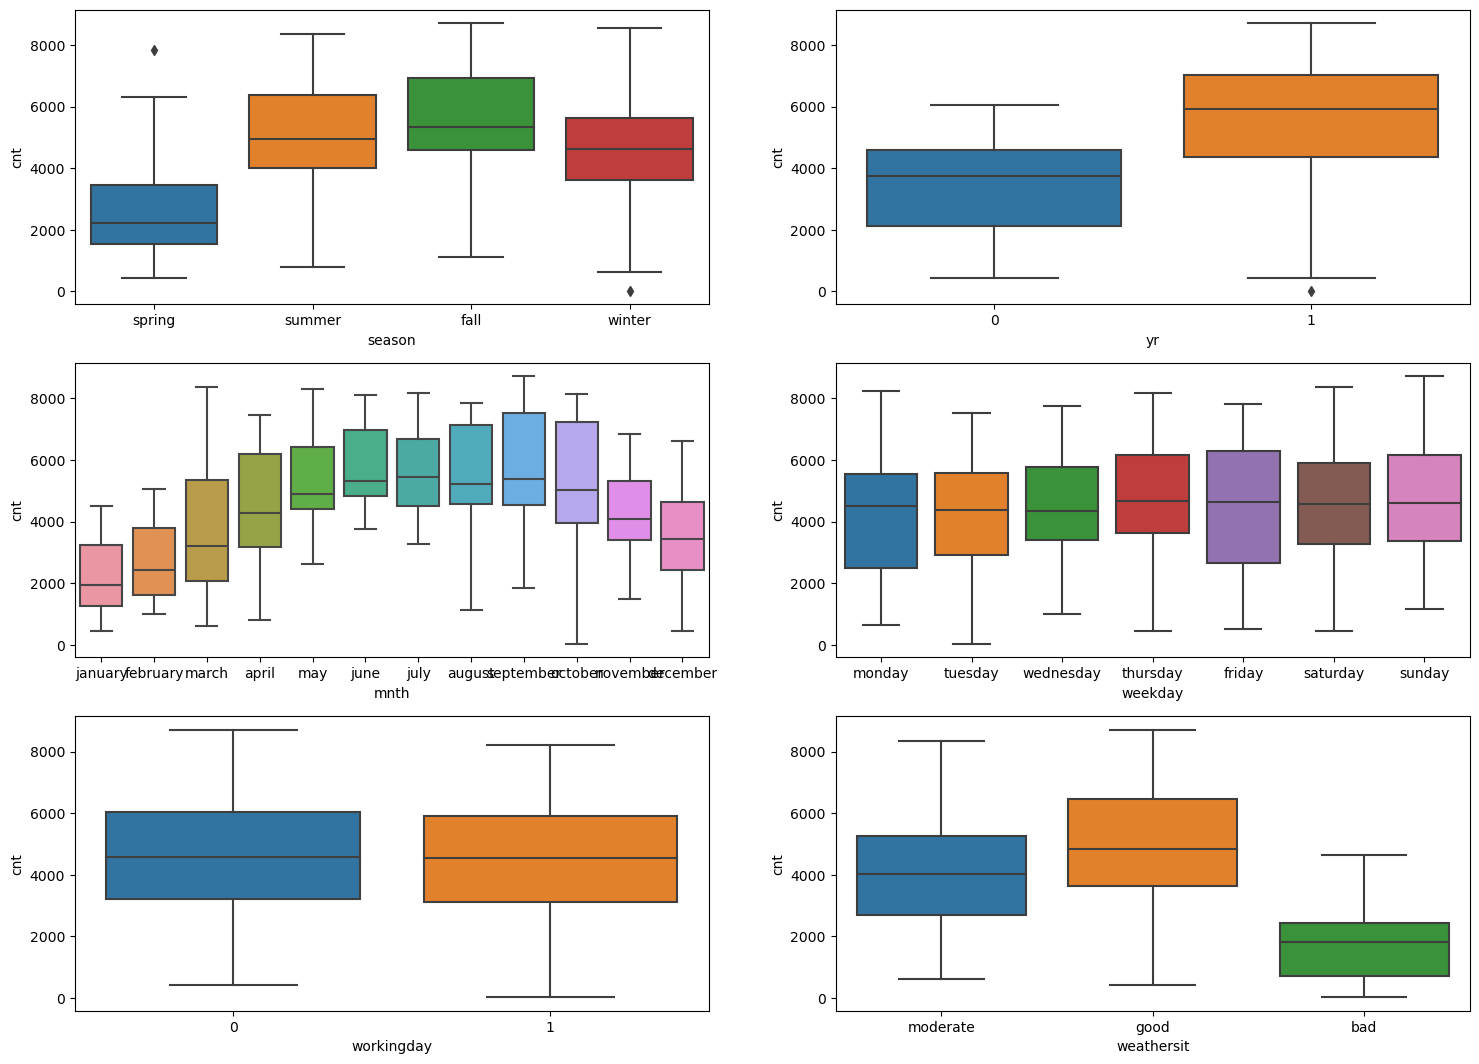

In [21]:
plt.figure(figsize=[18,13])

plt.subplot(3,2,1)
sns.boxplot(x='season',y='cnt',data=df)

plt.subplot(3,2,2)
sns.boxplot(x='yr',y='cnt',data=df)

plt.subplot(3,2,3)
sns.boxplot(x='mnth',y='cnt',data=df)

plt.subplot(3,2,4)
sns.boxplot(x='weekday',y='cnt',data=df)

plt.subplot(3,2,5)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(3,2,6)
sns.boxplot(x='weathersit',y='cnt',data=df)

# Plotting heatmap:

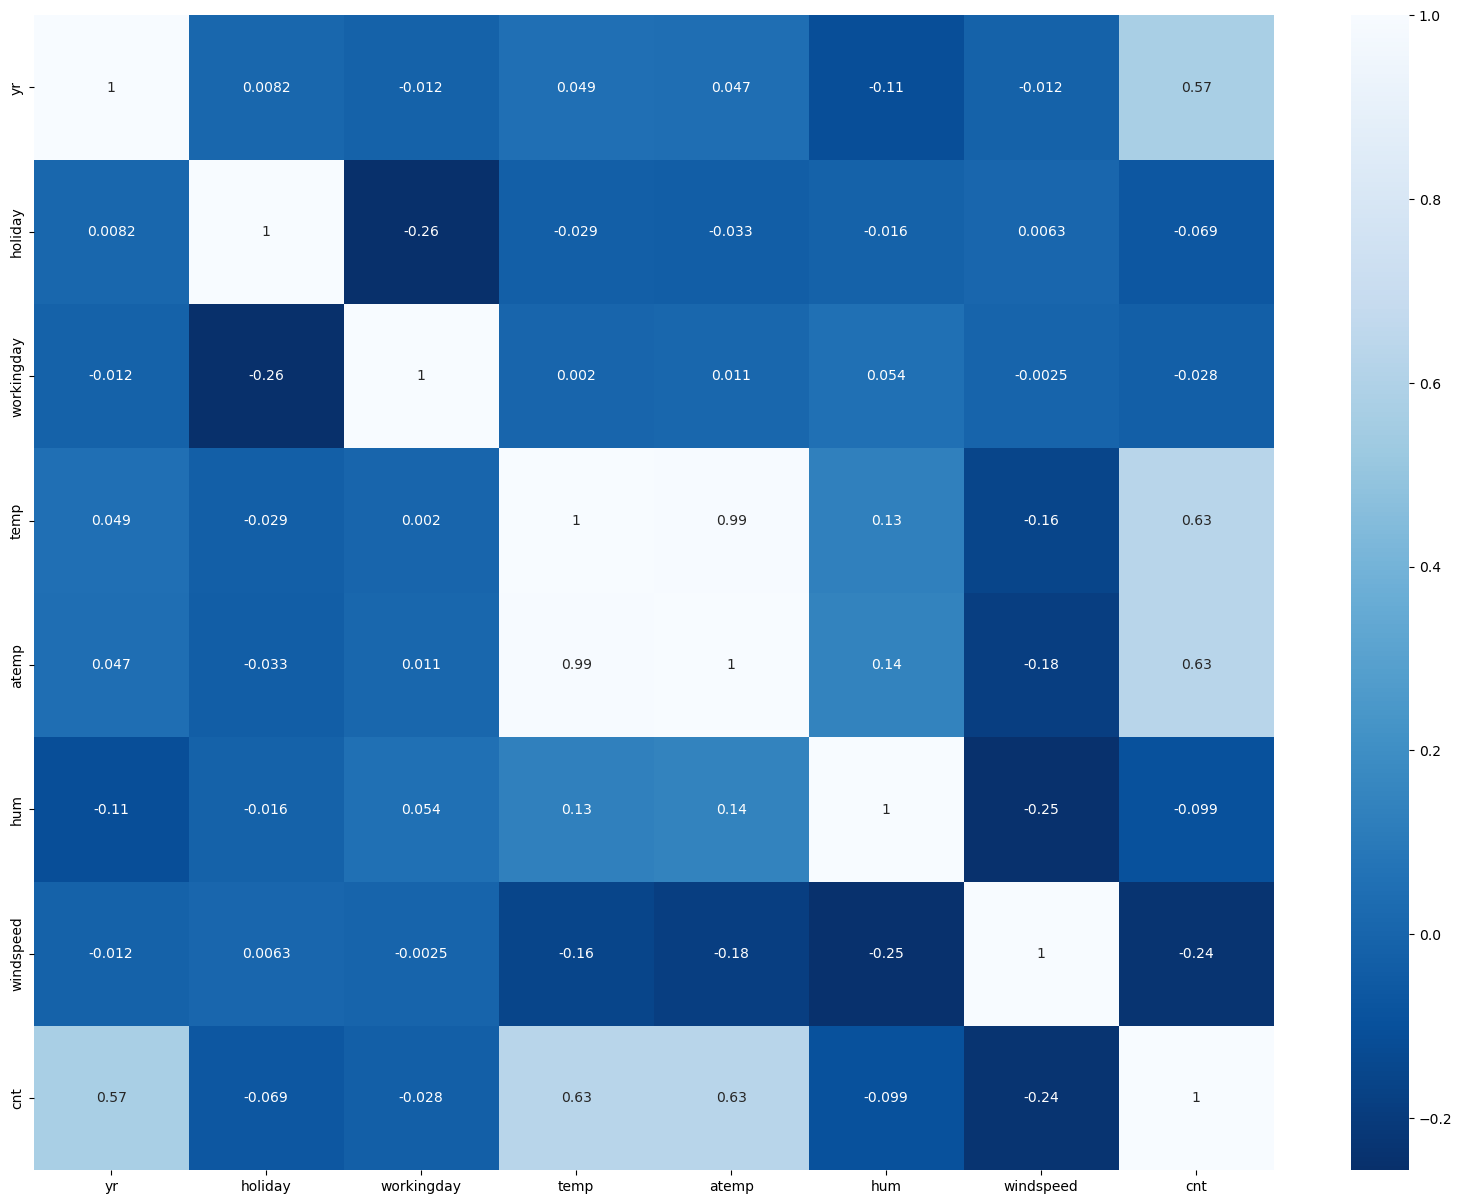

In [22]:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr(),cmap='Blues_r',annot=True)
plt.show()

In [23]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [24]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Creating Dummy Variables for Categorical Variables:

In [25]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [26]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

# Splitting dataset into Train and Test data:

In [28]:
#only target variable will be in y 
y=df.pop('cnt')

#all columns except 'cnt' will be in x 
x=df

#importing train test split:
from sklearn.model_selection import train_test_split

#splitting train and test dataset in 70:30 ratio:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [29]:
x_train.shape

(511, 30)

In [30]:
x_test.shape

(219, 30)

In [31]:
#scaling numerical variables:
cont_cols=['temp','atemp','hum','windspeed']

#importing Min Max Scaler:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#fit and transform on only training dataset:
x_train[cont_cols]=scaler.fit_transform(x_train[cont_cols])

In [32]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [33]:
x_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.712329,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.080235,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986,0.029354,0.626223,0.344423
std,0.500412,0.157613,0.453121,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.271923,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170,0.168963,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


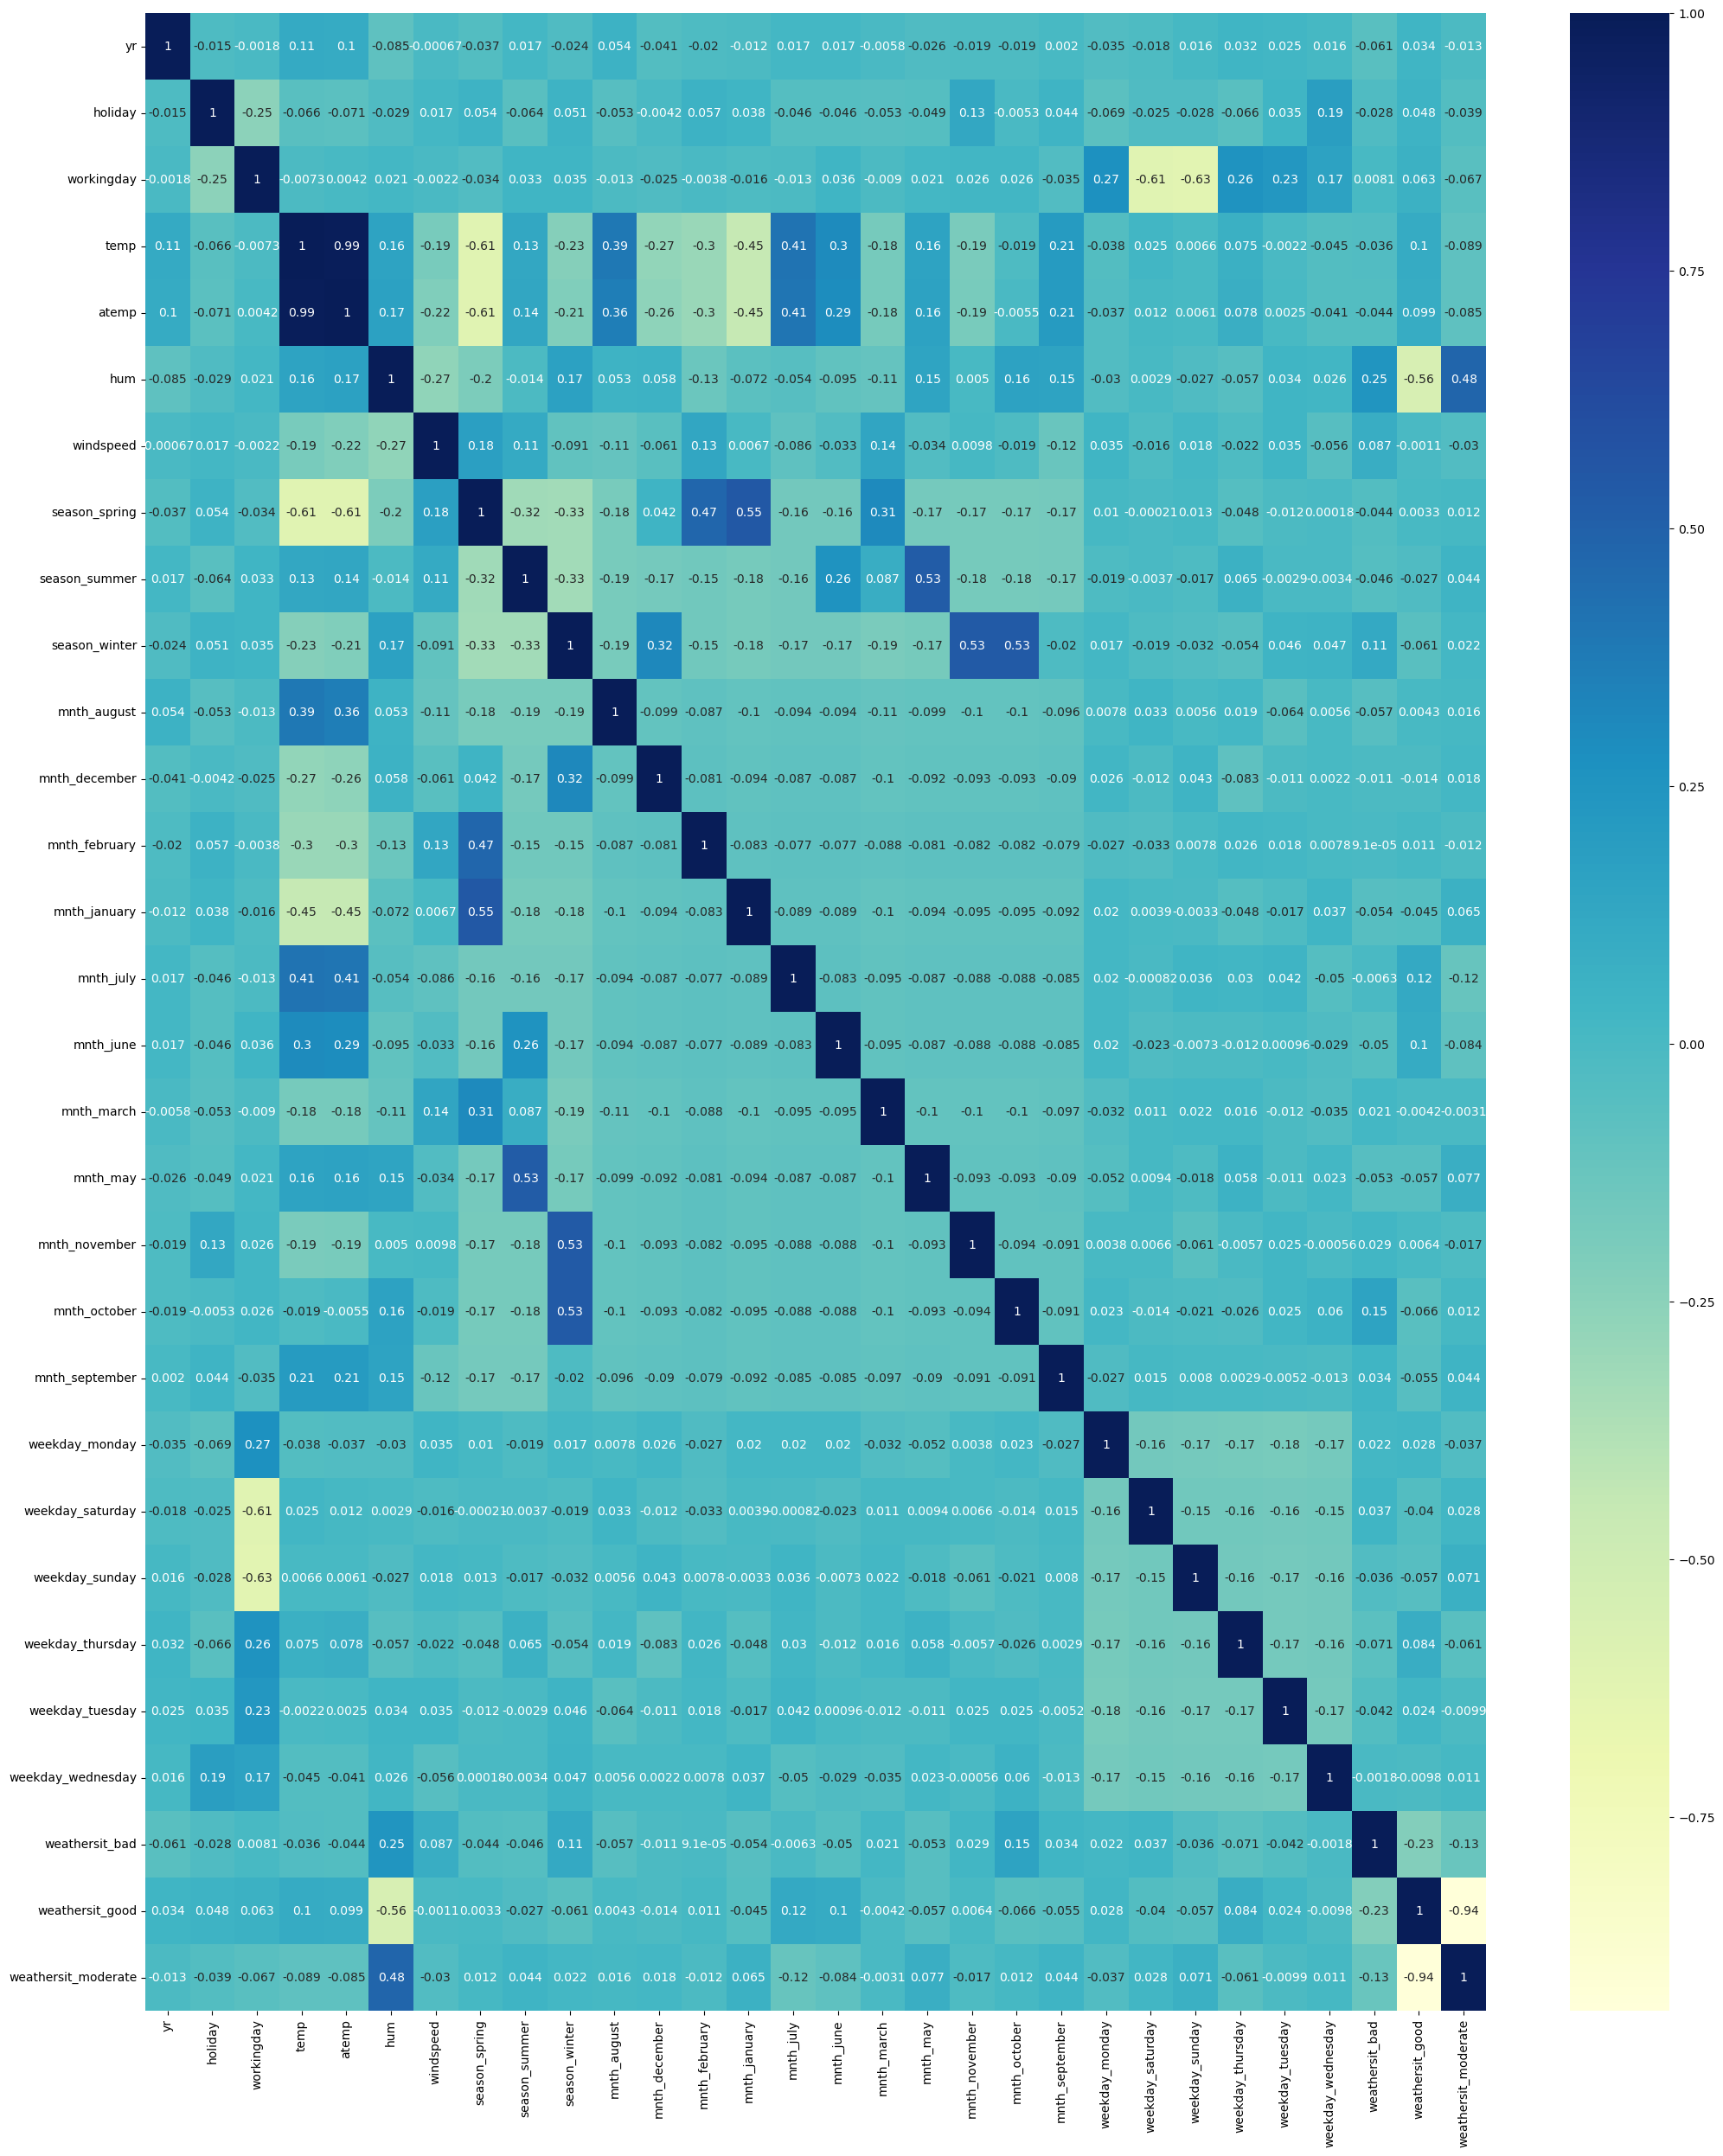

In [34]:
#Checking if the variables are highly correlated or not:
plt.figure(figsize=[25,30])
sns.heatmap(x_train.corr(), annot = True,cmap='YlGnBu')
plt.show()

# Building Model using RFE:

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Assuming lm is linear regression model
lm = LinearRegression()

# Specifying the number of features to select
num_features_to_select = 15

# Creating RFE instance
rfe = RFE(estimator=lm, n_features_to_select=num_features_to_select)

# Fit RFE on your training data
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [37]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_august', False, 11),
 ('mnth_december', False, 2),
 ('mnth_february', False, 3),
 ('mnth_january', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 13),
 ('mnth_march', False, 16),
 ('mnth_may', False, 10),
 ('mnth_november', True, 1),
 ('mnth_october', False, 14),
 ('mnth_september', True, 1),
 ('weekday_monday', False, 8),
 ('weekday_saturday', False, 5),
 ('weekday_sunday', False, 6),
 ('weekday_thursday', False, 15),
 ('weekday_tuesday', False, 7),
 ('weekday_wednesday', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [38]:
#importing statsmodel library:
import statsmodels.api as sm
#Function to build a model using statsmodel api
def stats_model(model):
    x_train_sm = sm.add_constant(x_train[model])
    lm = sm.OLS(y_train, x_train_sm).fit()
    print(lm.summary())
    return lm

In [39]:
#importing VIF library:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Function to calculate VIFs 
def vif_model(model):
    df1 = x_train[model]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [40]:
#Columns selected by RFE
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_january', 'mnth_july',
       'mnth_november', 'mnth_september', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [41]:
#columns not selected by RFE
x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_august', 'mnth_december', 'mnth_february',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_october', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')

In [42]:
# Taking 15 columns selected by RFE:
x_train_rfe = x_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_january', 'mnth_july',
       'mnth_november', 'mnth_september', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']]

# Building 1st Model:

In [43]:
model1=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_january', 'mnth_july',
       'mnth_november', 'mnth_september', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']
stats_model(model1)
vif_model(model1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.49e-189
Time:                        18:41:57   Log-Likelihood:                -4122.3
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     496   BIC:                             8338.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1356.6029    

# Building 2nd Model:

In [44]:
#we will drop mnth_november as it has pvalue > 0.05 
model2=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_january', 'mnth_july',
        'mnth_september', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']

stats_model(model2)
vif_model(model2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          2.94e-190
Time:                        18:41:57   Log-Likelihood:                -4123.4
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1311.9176    

#  Building 3rd Model:

In [45]:
#we will drop mnth_january as it has pvalue > 0.05 
model3=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter',  'mnth_july',
        'mnth_september', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']

stats_model(model3)
vif_model(model3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.12e-190
Time:                        18:41:57   Log-Likelihood:                -4125.2
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     498   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1241.2278    

#  Building 4th Model:

In [46]:
#we will drop weathersit_good as it has VIF > 5 
model4=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter',  'mnth_july',
        'mnth_september', 'weathersit_bad', 'weathersit_moderate']

stats_model(model4)
vif_model(model4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.12e-190
Time:                        18:41:58   Log-Likelihood:                -4125.2
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     498   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2495.9370    

#  Building 5th Model:

In [47]:
#we will drop hum as it has VIF > 5 
model5=['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter',  'mnth_july',
        'mnth_september', 'weathersit_bad', 'weathersit_moderate']

stats_model(model5)
vif_model(model5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          2.09e-187
Time:                        18:41:58   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     499   BIC:                             8346.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1749.8251    

In this model, all pvalues are < 0.05 and R square is 0.83.
So,this will be our final model. 

In [48]:
def sk_build_model(x,y):
    lm1=LinearRegression()
    lm1.fit(x,y)
    return lm1

In [49]:
lm=sk_build_model(x_train[model5],y_train)
print(lm.coef_,lm.intercept_)

[ 2034.82760556  -851.4753815   4274.32846259 -1284.84948049
  -580.96274502   404.76006733   722.66856854  -454.51692243
   665.90091375 -2476.32743875  -700.88665594] 1749.8251325431897


#  Resudial Analysis on Train Data:

In [50]:
y_train_pred=lm.predict(x_train[model5])

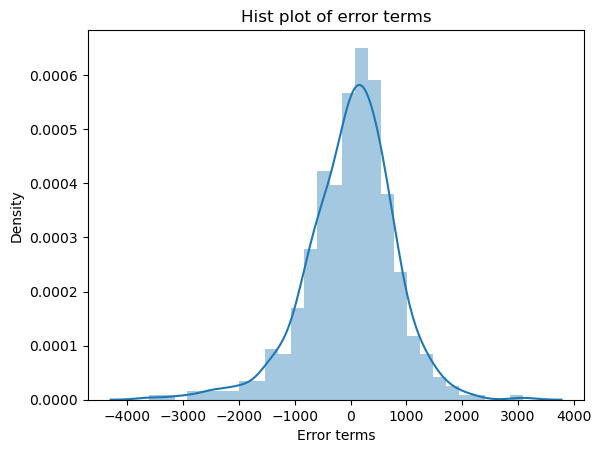

In [51]:
#plotting histogram of error terms
def res_plot(act,pred):
    sns.distplot(act-pred)
    plt.xlabel('Error terms')
    plt.title('Hist plot of error terms')

    
res_plot(y_train,y_train_pred)

In [52]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.8352755941698322

# Test Dataset:

In [53]:
cont_cols=['temp','atemp','hum','windspeed']

x_test[cont_cols]=scaler.fit_transform(x_test[cont_cols])

In [54]:
#Our final model was model-5 so selecting only those columns which were in model-5:
model5=['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter',  'mnth_july',
        'mnth_september', 'weathersit_bad', 'weathersit_moderate']

#predicting values on test dataset:
y_test_pred=lm.predict(x_test[model5])

In [55]:
r2_score(y_test,y_test_pred)

0.7886160510569026

In [56]:
#r-squared on test and predicted test data set:
y_pred=y_test_pred
r2_score(y_test,y_pred)

0.7886160510569026

#  Model Evaluation:

Text(0, 0.5, 'y_pred')

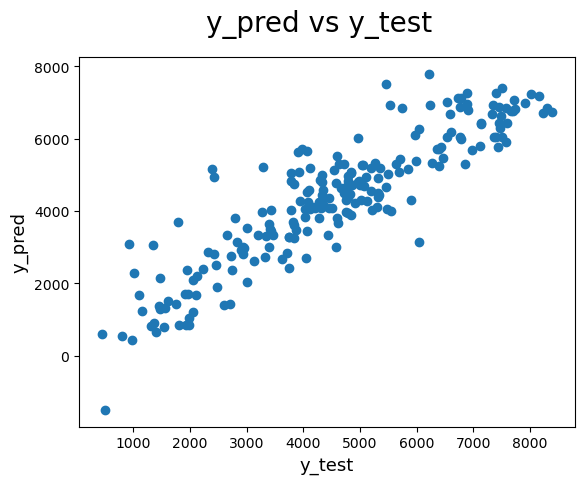

In [57]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_pred vs y_test' , fontsize=20)
plt.xlabel('y_test' , fontsize=13)
plt.ylabel('y_pred' , fontsize=13)

In [58]:
#rebuilding the model using RFE+manual approach
model5=['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter',  'mnth_july',
        'mnth_september', 'weathersit_bad', 'weathersit_moderate']

stats_model(model5)
vif_model(model5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          2.09e-187
Time:                        18:41:59   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     499   BIC:                             8346.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1749.8251    

# Result Interpretation:

1)Boom Bikes should focus on expanding the business in months like july,august,september.
2)Boom bikes should focus on expanding the business during summer,spring and winter
3)In rainy season there could be less booking , so Boom Bikes can utilize this time in servicing or repairing the bikes.

# Conclusion: